In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [2]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [3]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Converting string values into ints

In [6]:
# Converting hotel types from str to int

df.hotel = df.hotel.replace(['City Hotel', 'Resort Hotel'], [0, 1])

In [7]:
# Converting month from str to int

df.arrival_date_month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12})

In [8]:
# Creating a timeseries date and extraction of weekdays

df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [9]:
df['weekday'] = df['date'].dt.weekday

In [10]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [11]:
# Converting meal from str to int
df.meal = df.meal.map({'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4})

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [12]:
# Converting country from str to int

# First remove nan from list

land = df.country.unique()
check = [not pd.isnull(country) for country in land]
land = land[check]
land = np.sort(land)

land

array(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB',
       'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL',
       'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA',
       'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA',
       'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI',
       'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL',
       'NZL', 'OMN', 

In [13]:
# Now create a dictionary named "lan" to replace the country names with numbers

lan = {}
i = 0
for l in land:
    i += 1
    lan[l] = i

# Replacing:

df.country = df.country.map(lan)

# Second convert nan to 0 in country

df.country = df.country.fillna(0)

df.country = df.country.astype(int) # Converting from float to int

df.country.unique()

array([136,  60, 170,  52,  77,  57,   0, 140, 125, 128,   7, 134,  44,
        16,  30,  35,  67,  82, 124,  47, 141, 155,  12,  53,  43,  26,
        55, 114,  28, 101, 154,   4,  76,  32, 108, 104, 167, 149, 102,
       135, 150,  31,  13,  24, 100, 163, 175,   2,  81,  41, 176,  38,
       177,  49,  92,  39,  73,   6, 162,  83,  72,  70,  78,  61,   5,
        64, 169,  84,  29,  42,  36,  62,  93, 122, 107, 172, 153,  56,
        87, 129,  74,  95, 132, 145, 156,  14,  21, 127, 159,  48, 109,
       118,   8,  86,  99,  40,  34,  23, 116,  37, 152, 166,  20,  33,
        85, 157, 146,  15, 143, 174, 133, 139,  51, 131, 111, 117,  50,
       106,  80, 171, 126,  22, 103, 158, 164,  45, 151,  91,  54,  79,
        71, 142,  89, 105,  19,  75, 160, 123,  17, 173, 165,  59,  63,
       161,  65,  88,  98,  66, 113, 168, 119,  58, 112, 130,  18,  96,
       110, 120,  25, 137,  27,   1,   3, 148,  46, 138,  69,  97,  10,
        68,   9, 115, 121,  90, 144,  11, 147,  94])

In [14]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [15]:
# Converting market_segment from str to int

market_seg = df.market_segment.unique()

ms = {}
i = 0
for m in market_seg:
    i += 1
    ms[m] = i

# Replacement:

df.market_segment = df.market_segment.map(ms)

df.market_segment.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [16]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [17]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})

df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [18]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [19]:
# Converting reserved_room_type from str to int

res_room = np.sort(df.reserved_room_type.unique()) # values are being sorted and then assigned 

rrt = {}
i = 0
for r in res_room:
    i += 1
    rrt[r] = i

# Replacement: 

df.reserved_room_type = df.reserved_room_type.map(rrt)

df.reserved_room_type.unique()

array([ 3,  1,  4,  5,  7,  6,  8,  9, 10,  2], dtype=int64)

In [20]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [21]:
# Converting assigned_room_type from str to int

ass_room = np.sort(df.assigned_room_type.unique()) # values are being sorted and then assigned 

art = {}
i = 0
for a in ass_room:
    i += 1
    art[a] = i

# Replacement: 

df.assigned_room_type = df.assigned_room_type.map(art)

df.assigned_room_type.unique()

array([ 3,  1,  4,  5,  7,  6,  9,  2,  8, 12, 11, 10], dtype=int64)

In [22]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [23]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})

df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [24]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [25]:
# Converting customer_type from str to int

df.customer_type = df.customer_type.map({'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4})

df.customer_type.unique()

array([1, 3, 2, 4], dtype=int64)

In [26]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [27]:
# Converting reservation_status from str to int

df.reservation_status = df.reservation_status.map({'No-Show':0, 'Check-Out':1, 'Canceled':2})

df.reservation_status.unique()

array([1, 2, 0], dtype=int64)

In [28]:
# Filling missing values with 0

df.children = df.children.fillna(0)
df.children = df.children.astype(int)

df.agent = df.agent.fillna(0)
df.agent = df.agent.astype(int)

df.company = df.company.fillna(0)
df.company = df.company.astype(int)

df.adr = df.adr.astype(int)

<AxesSubplot:>

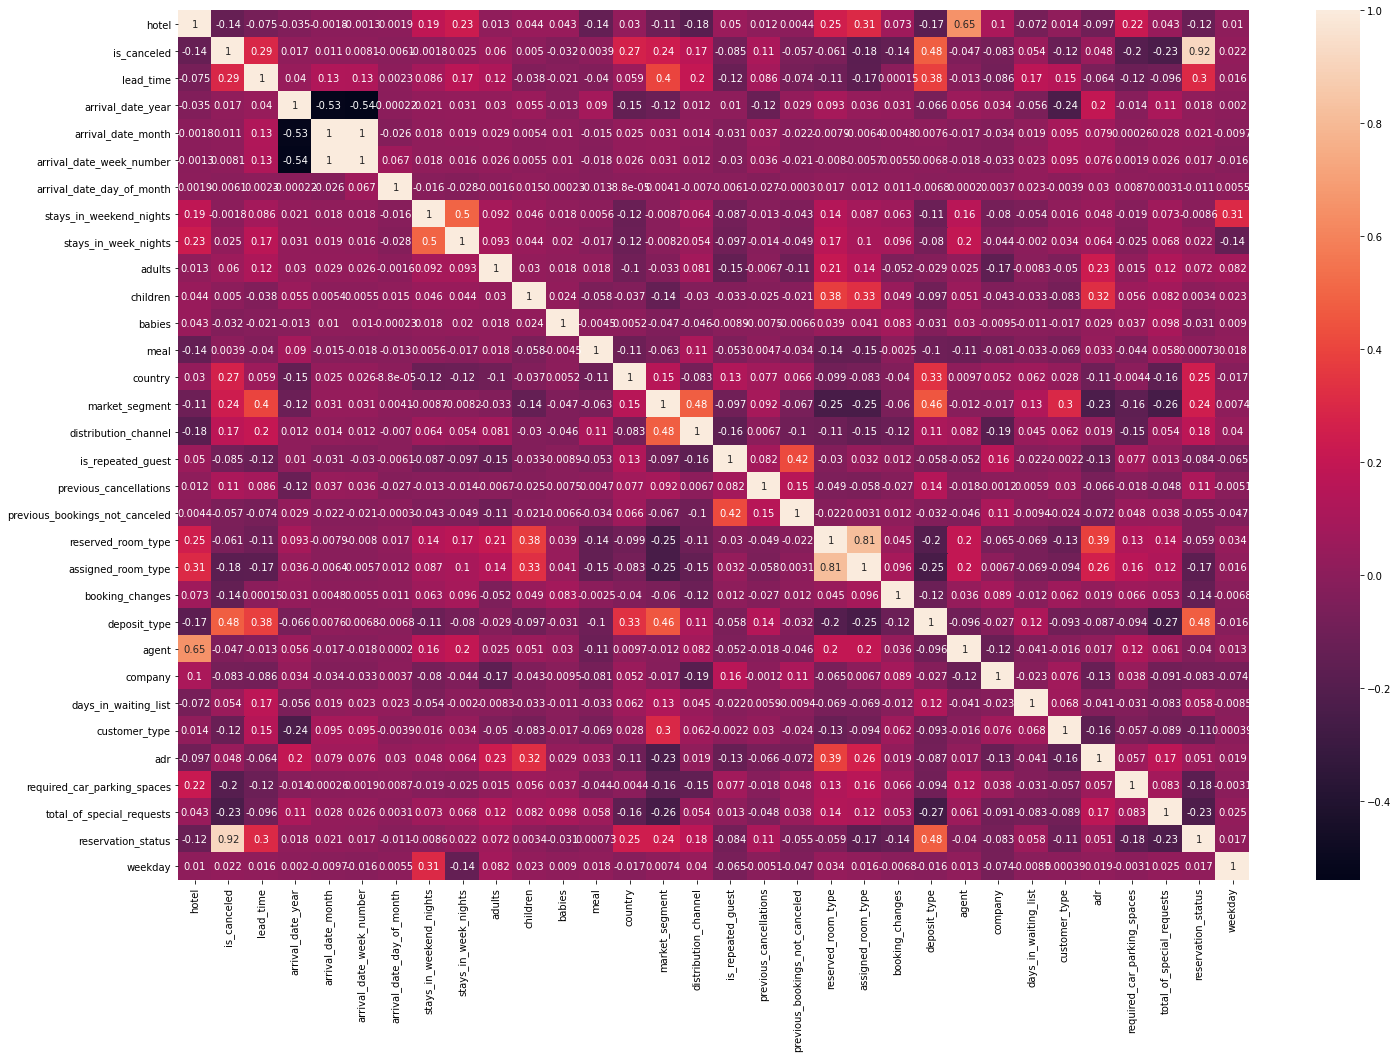

In [29]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [30]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
reservation_status                0.917196
deposit_type                      0.480434
lead_time                         0.293123
country                           0.271558
market_segment                    0.238335
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.171420
booking_changes                   0.144381
hotel                             0.136531
customer_type                     0.121862
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
reserved_room_type                0.061282
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047921
agent                             0.046529
babies                            0.032491
stays_in_we

In [31]:
# Separation of the 2 hotel types for a more detailed observation

df_city_hotel = df[df.hotel == 0]
df_resort_hotel = df[df.hotel == 1]

<AxesSubplot:>

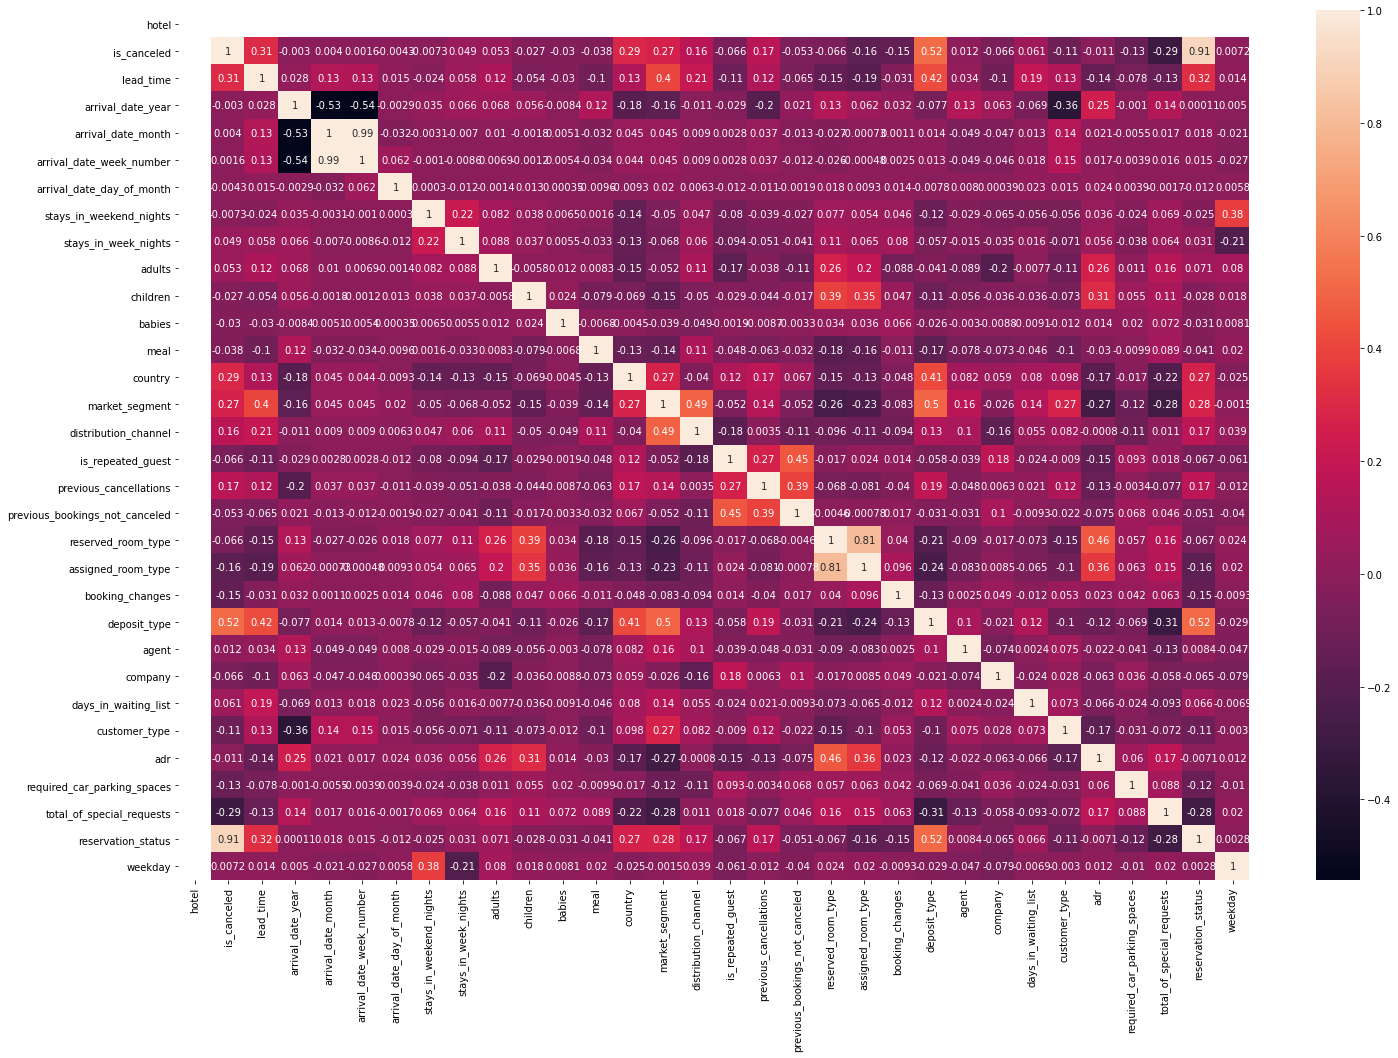

In [32]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_city_hotel.corr(), annot=True, ax = ax)

<AxesSubplot:>

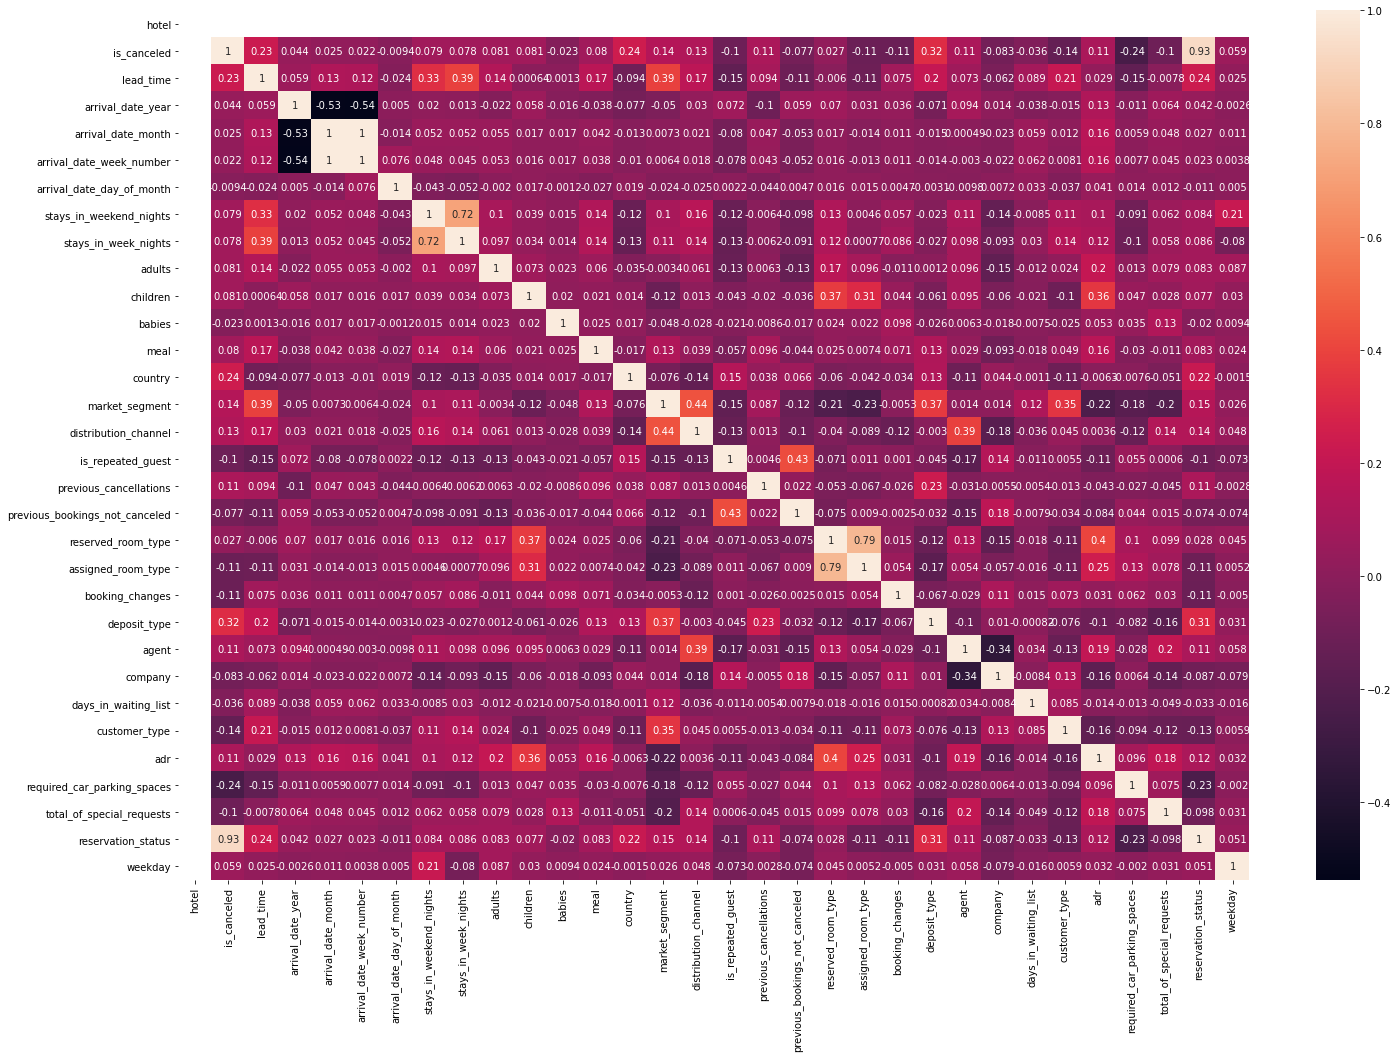

In [33]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_resort_hotel.corr(), annot=True, ax = ax)


In [ ]:
# Creating df_compact with only relevant columns for prediction of cancellation

selected_cols = ('market_segment', 'distribution_channel', 'deposit_type', 'hotel')
filter_cols = [col for col in df if col.startswith(selected_cols)]
df_compact = df[['is_canceled', 'lead_time', 'previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests']]
df2 = df[filter_cols]
df_compact = pd.concat([df_compact, df2], axis = 1)

In [34]:
# CANCELLATION PREDICTION - ALL DATA BUT WITHOUT RESERVATION_STATUS

In [35]:
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'date'], axis = 1)
y = df['is_canceled']
y = np.array(y)

In [36]:
# Scaling

X_scaled = StandardScaler().fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 3)

In [38]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
version_lr = accuracy_score(y_test, model_lr_prediction)
version_lr

0.7967585224893207

In [39]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.5380660389426496

Feature: 0, Score: 0.02048
Feature: 1, Score: 0.35436
Feature: 2, Score: 0.14622
Feature: 3, Score: 0.02483
Feature: 4, Score: 0.01900
Feature: 5, Score: -0.00095
Feature: 6, Score: -0.00607
Feature: 7, Score: 0.12379
Feature: 8, Score: 0.11148
Feature: 9, Score: 0.08420
Feature: 10, Score: 0.00845
Feature: 11, Score: 0.06064
Feature: 12, Score: 0.50208
Feature: 13, Score: -0.23836
Feature: 14, Score: 0.41715
Feature: 15, Score: -0.14808
Feature: 16, Score: 2.12487
Feature: 17, Score: -0.62885
Feature: 18, Score: 0.78202
Feature: 19, Score: -0.93224
Feature: 20, Score: -0.22891
Feature: 21, Score: 1.52989
Feature: 22, Score: -0.02787
Feature: 23, Score: -0.06664
Feature: 24, Score: -0.03606
Feature: 25, Score: -0.39147
Feature: 26, Score: 0.20704
Feature: 27, Score: -6.04924
Feature: 28, Score: -0.48864
Feature: 29, Score: 0.08051


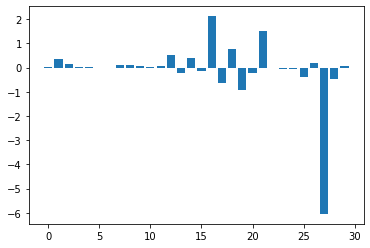

In [92]:
#Feature Importance

feature_lr = []

# Get importance
importance = model_lr.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	feature_lr.append(v)	# This will be used later to predict the cancellation rate only for the top 15 features
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [93]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_lr)):
    if feature_lr[i]<0:
        feature_lr[i] = feature_lr[i]*(-1)

feature_lr = pd.DataFrame(feature_lr)
feature_lr.reset_index(inplace=True)
feature_lr.columns = ['feature', 'score']
feature_lr['feature_name'] = X.columns
feature_lr.sort_values(by=['score'], ascending = False, inplace=True)
feature_lr.reset_index(drop = True, inplace = True)
feature_lr

feature     score                    feature_name
0        27  6.049235     required_car_parking_spaces
1        16  2.124870          previous_cancellations
2        21  1.529893                    deposit_type
3        19  0.932237              assigned_room_type
4        18  0.782016              reserved_room_type
5        17  0.628848  previous_bookings_not_canceled
6        12  0.502082                         country
7        28  0.488640       total_of_special_requests
8        14  0.417152            distribution_channel
9        25  0.391473                   customer_type
10        1  0.354355                       lead_time
11       13  0.238355                  market_segment
12       20  0.228914                 booking_changes
13       26  0.207043                             adr
14       15  0.148084               is_repeated_guest
15        2  0.146221               arrival_date_year
16        7  0.123791            stays_in_week_nights
17        8  0.111480                          adults
18        9  0.084204                        children
19       29  0.080511                         weekday
20       23  0.066640                         company
21       11  0.060641                            meal
22       24  0.036065            days_in_waiting_list
23       22  0.027875                           agent
24        3  0.024831              arrival_date_month
25        0  0.020485                           hotel
26        4  0.019005        arrival_date_week_number
27       10  0.008450                          babies
28        6  0.006073         stays_in_weekend_nights
29        5  0.000947       arrival_date_day_of_month

In [94]:
lr_top15_features = []
for i in range(15):
    lr_top15_features.append(feature_lr.feature_name[i])
lr_top15_features

['required_car_parking_spaces',
 'previous_cancellations',
 'deposit_type',
 'assigned_room_type',
 'reserved_room_type',
 'previous_bookings_not_canceled',
 'country',
 'total_of_special_requests',
 'distribution_channel',
 'customer_type',
 'lead_time',
 'market_segment',
 'booking_changes',
 'adr',
 'is_repeated_guest']

In [96]:
df_lr_top15 = X[lr_top15_features]
df_lr_top15

required_car_parking_spaces  previous_cancellations  deposit_type  \
0                                 0                       0             0   
1                                 0                       0             0   
2                                 0                       0             0   
3                                 0                       0             0   
4                                 0                       0             0   
...                             ...                     ...           ...   
119385                            0                       0             0   
119386                            0                       0             0   
119387                            0                       0             0   
119388                            0                       0             0   
119389                            0                       0             0   

        assigned_room_type  reserved_room_type  \
0                        3                   3   
1                        3                   3   
2                        3                   1   
3                        1                   1   
4                        1                   1   
...                    ...                 ...   
119385                   1                   1   
119386                   5                   5   
119387                   4                   4   
119388                   1                   1   
119389                   1                   1   

        previous_bookings_not_canceled  country  total_of_special_requests  \
0                                    0      136                          0   
1                                    0      136                          0   
2                                    0       60                          0   
3                                    0       60                          0   
4                                    0       60                          1   
...                                ...      ...                        ...   
119385                               0       16                          0   
119386                               0       57                          2   
119387                               0       44                          4   
119388                               0       60                          0   
119389                               0       44                          2   

        distribution_channel  customer_type  lead_time  market_segment  \
0                          1              1        342               1   
1                          1              1        737               1   
2                          1              1          7               1   
3                          2              1         13               2   
4                          3              1         14               3   
...                      ...            ...        ...             ...   
119385                     3              1         23               4   
119386                     3              1        102               3   
119387                     3              1         34               3   
119388                     3              1        109               3   
119389                     3              1        205               3   

        booking_changes  adr  is_repeated_guest  
0                     3    0                  0  
1                     4    0                  0  
2                     0   75                  0  
3                     0   75                  0  
4                     0   98                  0  
...                 ...  ...                ...  
119385                0   96                  0  
119386                0  225                  0  
119387                0  157                  0  
119388                0  104                  0  
119389                0  151                  0  

[119390 rows x 15 columns]

In [42]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
version_dt = accuracy_score(y_test, model_dt_prediction)
version_dt

0.8543429097914398

In [43]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.6888402969145082

Feature: 0, Score: 0.00266
Feature: 1, Score: 0.11225
Feature: 2, Score: 0.02418
Feature: 3, Score: 0.01091
Feature: 4, Score: 0.04147
Feature: 5, Score: 0.04739
Feature: 6, Score: 0.01583
Feature: 7, Score: 0.02618
Feature: 8, Score: 0.00887
Feature: 9, Score: 0.00460
Feature: 10, Score: 0.00101
Feature: 11, Score: 0.01016
Feature: 12, Score: 0.07614
Feature: 13, Score: 0.07212
Feature: 14, Score: 0.00384
Feature: 15, Score: 0.00080
Feature: 16, Score: 0.02312
Feature: 17, Score: 0.00552
Feature: 18, Score: 0.01010
Feature: 19, Score: 0.01321
Feature: 20, Score: 0.01502
Feature: 21, Score: 0.23407
Feature: 22, Score: 0.06034
Feature: 23, Score: 0.00281
Feature: 24, Score: 0.00162
Feature: 25, Score: 0.01679
Feature: 26, Score: 0.06553
Feature: 27, Score: 0.02366
Feature: 28, Score: 0.04414
Feature: 29, Score: 0.02565


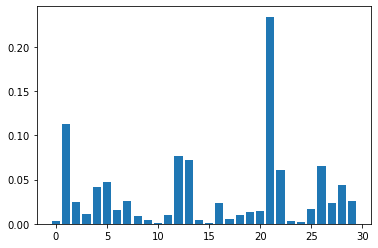

In [99]:
#Feature Importance

feature_dt = []

# get importance

importance = model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	feature_dt.append(v)	# This will be used later to predict the cancellation rate only for the top 15 features
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [100]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_dt)):
    if feature_dt[i]<0:
        feature_dt[i] = feature_dt[i]*(-1)

feature_dt = pd.DataFrame(feature_dt)
feature_dt.reset_index(inplace=True)
feature_dt.columns = ['feature', 'score']
feature_dt['feature_name'] = X.columns
feature_dt.sort_values(by=['score'], ascending = False, inplace=True)
feature_dt.reset_index(drop = True, inplace = True)

dt_top15_features = []
for i in range(15):
    dt_top15_features.append(feature_dt.feature_name[i])

df_dt_top15 = X[dt_top15_features]
df_dt_top15

deposit_type  lead_time  country  market_segment  adr  agent  \
0                  0        342      136               1    0      0   
1                  0        737      136               1    0      0   
2                  0          7       60               1   75      0   
3                  0         13       60               2   75    304   
4                  0         14       60               3   98    240   
...              ...        ...      ...             ...  ...    ...   
119385             0         23       16               4   96    394   
119386             0        102       57               3  225      9   
119387             0         34       44               3  157      9   
119388             0        109       60               3  104     89   
119389             0        205       44               3  151      9   

        arrival_date_day_of_month  total_of_special_requests  \
0                               1                          0   
1                               1                          0   
2                               1                          0   
3                               1                          0   
4                               1                          1   
...                           ...                        ...   
119385                         30                          0   
119386                         31                          2   
119387                         31                          4   
119388                         31                          0   
119389                         29                          2   

        arrival_date_week_number  stays_in_week_nights  weekday  \
0                             27                     0        2   
1                             27                     0        2   
2                             27                     1        2   
3                             27                     1        2   
4                             27                     2        2   
...                          ...                   ...      ...   
119385                        35                     5        2   
119386                        35                     5        3   
119387                        35                     5        3   
119388                        35                     5        3   
119389                        35                     7        1   

        arrival_date_year  required_car_parking_spaces  \
0                    2015                            0   
1                    2015                            0   
2                    2015                            0   
3                    2015                            0   
4                    2015                            0   
...                   ...                          ...   
119385               2017                            0   
119386               2017                            0   
119387               2017                            0   
119388               2017                            0   
119389               2017                            0   

        previous_cancellations  customer_type  
0                            0              1  
1                            0              1  
2                            0              1  
3                            0              1  
4                            0              1  
...                        ...            ...  
119385                       0              1  
119386                       0              1  
119387                       0              1  
119388                       0              1  
119389                       0              1  

[119390 rows x 15 columns]

Maximum:  0.9581239530988275
Mean:  0.8158760806268479


<AxesSubplot:>

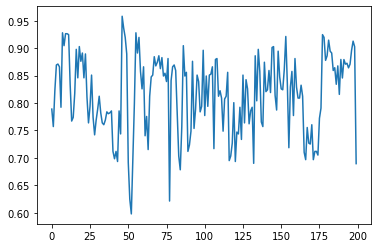

In [46]:
# K-Fold DecisionTree
dt_plot_DV = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =5), X, y, cv=25
print('Maximum: ', dt_plot_DV.max())
print('Mean: ', dt_plot_DV.mean())
dt_plot_DV = pd.Series(dt_plot_DV)
dt_plot_DV.plot()

In [48]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
version_knn = accuracy_score(y_test, model_knn_prediction)
version_knn

0.8338219281346847

In [49]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.6410150707366751

In [50]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.8950498366697378

In [51]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.7712481471385515

Feature: 0, Score: 0.00852
Feature: 1, Score: 0.12127
Feature: 2, Score: 0.02247
Feature: 3, Score: 0.02774
Feature: 4, Score: 0.04644
Feature: 5, Score: 0.04785
Feature: 6, Score: 0.01904
Feature: 7, Score: 0.03161
Feature: 8, Score: 0.01211
Feature: 9, Score: 0.00583
Feature: 10, Score: 0.00080
Feature: 11, Score: 0.01215
Feature: 12, Score: 0.11071
Feature: 13, Score: 0.04745
Feature: 14, Score: 0.01378
Feature: 15, Score: 0.00194
Feature: 16, Score: 0.03261
Feature: 17, Score: 0.00402
Feature: 18, Score: 0.01400
Feature: 19, Score: 0.02411
Feature: 20, Score: 0.02068
Feature: 21, Score: 0.11507
Feature: 22, Score: 0.05282
Feature: 23, Score: 0.00428
Feature: 24, Score: 0.00208
Feature: 25, Score: 0.02666
Feature: 26, Score: 0.06755
Feature: 27, Score: 0.02278
Feature: 28, Score: 0.05496
Feature: 29, Score: 0.02869


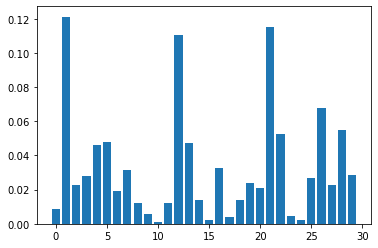

In [103]:
#Feature Importance

feature_rf = []

# get importance

importance = model_rf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	feature_rf.append(v)	# This will be used later to predict the cancellation rate only for the top 15 features
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [104]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_rf)):
    if feature_rf[i]<0:
        feature_rf[i] = feature_rf[i]*(-1)

feature_rf = pd.DataFrame(feature_rf)
feature_rf.reset_index(inplace=True)
feature_rf.columns = ['feature', 'score']
feature_rf['feature_name'] = X.columns
feature_rf.sort_values(by=['score'], ascending = False, inplace=True)
feature_rf.reset_index(drop = True, inplace = True)

rf_top15_features = []
for i in range(15):
    rf_top15_features.append(feature_rf.feature_name[i])

df_rf_top15 = X[rf_top15_features]
df_rf_top15

lead_time  deposit_type  country  adr  total_of_special_requests  \
0             342             0      136    0                          0   
1             737             0      136    0                          0   
2               7             0       60   75                          0   
3              13             0       60   75                          0   
4              14             0       60   98                          1   
...           ...           ...      ...  ...                        ...   
119385         23             0       16   96                          0   
119386        102             0       57  225                          2   
119387         34             0       44  157                          4   
119388        109             0       60  104                          0   
119389        205             0       44  151                          2   

        agent  arrival_date_day_of_month  market_segment  \
0           0                          1               1   
1           0                          1               1   
2           0                          1               1   
3         304                          1               2   
4         240                          1               3   
...       ...                        ...             ...   
119385    394                         30               4   
119386      9                         31               3   
119387      9                         31               3   
119388     89                         31               3   
119389      9                         29               3   

        arrival_date_week_number  previous_cancellations  \
0                             27                       0   
1                             27                       0   
2                             27                       0   
3                             27                       0   
4                             27                       0   
...                          ...                     ...   
119385                        35                       0   
119386                        35                       0   
119387                        35                       0   
119388                        35                       0   
119389                        35                       0   

        stays_in_week_nights  weekday  arrival_date_month  customer_type  \
0                          0        2                   7              1   
1                          0        2                   7              1   
2                          1        2                   7              1   
3                          1        2                   7              1   
4                          2        2                   7              1   
...                      ...      ...                 ...            ...   
119385                     5        2                   8              1   
119386                     5        3                   8              1   
119387                     5        3                   8              1   
119388                     5        3                   8              1   
119389                     7        1                   8              1   

        assigned_room_type  
0                        3  
1                        3  
2                        3  
3                        1  
4                        1  
...                    ...  
119385                   1  
119386                   5  
119387                   4  
119388                   1  
119389                   1  

[119390 rows x 15 columns]

In [97]:
# Logistic Regression with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_lr_top15, y, test_size = 0.2, random_state = 3)

model_lr_top15 = LogisticRegression().fit(X_train, y_train)
model_lr_top15_prediction = model_lr_top15.predict(X_test)
version_lr_top15 = accuracy_score(y_test, model_lr_top15_prediction)
version_lr_top15

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7882569729458079

In [98]:
kappa_lr_top15 = cohen_kappa_score(y_test, model_lr_top15_prediction)
kappa_lr_top15

0.519299661509423

In [101]:
# Decision Tree with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_dt_top15, y, test_size = 0.2, random_state = 3)

model_dt_top15 = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_top15_prediction = model_dt_top15.predict(X_test)
version_dt_top15 = accuracy_score(y_test, model_dt_top15_prediction)
version_dt_top15

0.8546779462266522

In [102]:
kappa_dt_top15 = cohen_kappa_score(y_test, model_dt_top15_prediction)
kappa_dt_top15

0.6898430989767037

In [111]:
# Random Forest with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_rf_top15, y, test_size = 0.2, random_state = 3)

model_rf_top15 = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_top15_prediction = model_rf_top15.predict(X_test)
version_rf_top15 = accuracy_score(y_test, model_rf_top15_prediction)
version_rf_top15

0.8811877041628277

In [112]:
kappa_rf_top15 = cohen_kappa_score(y_test, model_rf_top15_prediction)
kappa_rf_top15

0.740562269323136